In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
%matplotlib inline
from matplotlib.offsetbox import AnchoredText

def addsubfiglabels(axx):
    try:
        len(axx)
    except TypeError:
        return
    ascii_letters = 'abcdefghijklmnopqrstuvwxyz'*(len(axx.ravel())//26+1)
    for letter,ax in zip(ascii_letters,axx.ravel()):
        at = AnchoredText(letter,frameon=True, loc='upper left')#prop=dict(size=15)
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)

## determine the mean height of peaks vs overvoltage

In [2]:
datafolder = "overvoltage_apd2/"
files = sorted(os.listdir(datafolder))
file=files[0]
files

['1443v01_0000000.CSV',
 '1443v01_0000001.CSV',
 '1443v01_0000002.CSV',
 '1443v01_0000003.CSV',
 '1443v01_0000004.CSV',
 '1443v01_0000005.CSV',
 '1443v01_0000006.CSV',
 '1443v01_0000007.CSV',
 '1443v01_0000008.CSV',
 '1443v01_0000009.CSV',
 '1443v01_0000010.CSV',
 '1443v01_0000011.CSV',
 '1443v01_0000012.CSV',
 '1443v01_0000013.CSV',
 '1443v01_0000014.CSV',
 '1443v01_0000015.CSV',
 '1443v01_0000016.CSV',
 '1443v01_0000017.CSV',
 '1443v01_0000018.CSV',
 '1443v01_0000019.CSV',
 '1443v01_0000020.CSV',
 '1443v01_0000021.CSV',
 '1443v01_0000022.CSV',
 '1443v01_0000023.CSV',
 '1443v01_0000024.CSV',
 '1443v01_0000025.CSV',
 '1443v01_0000026.CSV',
 '1443v01_0000027.CSV',
 '1443v01_0000028.CSV',
 '1443v01_0000029.CSV',
 '1443v01_0000030.CSV',
 '1443v01_0000031.CSV',
 '1443v01_0000032.CSV',
 '1443v01_0000033.CSV',
 '1443v01_0000034.CSV',
 '1443v01_0000035.CSV',
 '1443v01_0000036.CSV',
 '1443v01_0000037.CSV',
 '1443v01_0000038.CSV',
 '1443v01_0000039.CSV',
 '1443v01_0000040.CSV',
 '1443v01_000004

In [3]:
def get_oscilloscope_data(file,headers=True,raw=False):
    data = ""
    with open(file,"r") as f:#f"{datafolder}{file}"
        data = f.readlines()
    if not headers: # returns just the data portion
        return data[25:]
    
    numCH = len(data[0].split(","))//2
    scopeHeaders=dict([(i+1,dict()) for i in range(numCH)]) # indexed from 1
    for h in data[:24]:
        h = h.split(",")
        for ch in range(1,numCH+1):
            try:
                scopeHeaders[ch][h[0]] = float(h[int((ch-1)*2+1)])
            except ValueError:
                scopeHeaders[ch][h[0]] = h[int((ch-1)*2+1)]
    if raw:
        return data[25:],scopeHeaders
    parsed_data = dict([(ch,[]) for ch in range(1,numCH+1)])
    for dd in data[25:]:
        dd = dd.split(",")
        for i,d in enumerate(dd[:-1]):
            parsed_data[i+1].append(int(d))
    parsed_data = dict([(ch,np.array(parsed_data[ch])) for ch in range(1,numCH+1)])
    return parsed_data,scopeHeaders

In [4]:
dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")

In [5]:
headers

{1: {'Format': '1.0B',
  'Memory Length': 10000.0,
  'IntpDistance': 0.0,
  'Trigger Address': 4999.0,
  'Trigger Level': 0.16,
  'Source': 'CH1',
  'Vertical Units': 'V',
  'Vertical Units Div': 0.0,
  'Vertical Units Extend Div': 16.0,
  'Label': '',
  'Probe Type': 0.0,
  'Probe Ratio': 10.0,
  'Vertical Scale': 0.2,
  'Vertical Position': -0.712,
  'Horizontal Units': 'S',
  'Horizontal Scale': 5e-05,
  'Horizontal Position': 0.0,
  'Horizontal Mode': 'Main',
  'SincET Mode': 'Real Time',
  'Sampling Period': 5e-08,
  'Horizontal Old Scale': 5e-05,
  'Horizontal Old Position': 0.0,
  'Firmware': 'V1.23',
  'Mode': 'Fast'}}

In [6]:
headers[1]["Sampling Period"],headers[1]["Vertical Scale"]

(5e-08, 0.2)

In [7]:
vpos  =headers[1]["Vertical Position"]
def getvoltage(oscilloscope_data,header):
    vdiv  =header["Vertical Scale"]
    dv  = vdiv/25
    return oscilloscope_data*dv#-header["Vertical Position"]

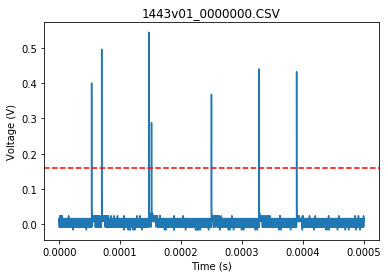

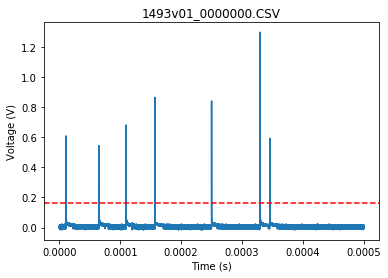

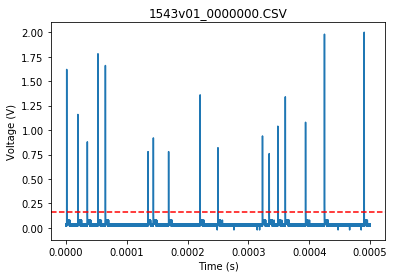

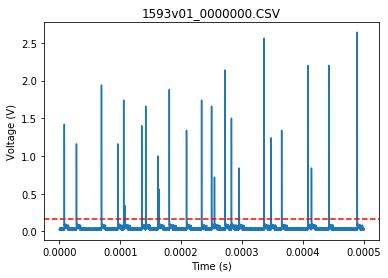

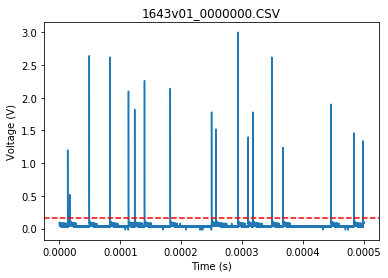

In [9]:
for file in files[::100]:
    dataseq,headers=get_oscilloscope_data(f"{datafolder}{file}")
    samplingperiod = headers[1]["Sampling Period"]
    plt.figure()
    plt.plot(np.arange(len(dataseq[1]))*samplingperiod,getvoltage(dataseq[1],headers[1]))
    plt.axhline(headers[1]["Trigger Level"],c="r",ls="--")
    plt.ylabel("Voltage (V)")
    plt.title(file)
    #plt.ylim(-4*vdiv-vpos,4*vdiv-vpos)
    plt.xlabel("Time (s)")
    plt.show()